In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is ECD7-FC17

 Directory of C:\Users\Admin\Desktop\DS Assignments\SLR

25/01/2023  01:43    <DIR>          .
25/01/2023  01:43    <DIR>          ..
26/12/2022  05:51    <DIR>          .ipynb_checkpoints
26/12/2022  05:36               218 delivery_time.csv
26/12/2022  02:42               454 Salary_Data.csv
26/12/2022  08:02           125,060 SLR Prob1.ipynb
25/01/2023  01:43           118,297 SLR Prob2.ipynb
               4 File(s)        244,029 bytes
               3 Dir(s)  115,715,424,256 bytes free


In [3]:
SD=pd.read_csv("salary_data.csv")
SD.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#normalising data

In [5]:
# copy the data
Normdata = SD.copy()

# apply normalization techniques
for column in Normdata.columns:
    Normdata[column] = Normdata[column] / Normdata[column].abs().max() 	

# view normalized data
#print(Data1_min_max_scaled)
#Data1_min_max_scaled
Normdata


,YearsExperience,Salary
0,0.104762,0.321453
1,0.123810,0.377520
2,0.142857,0.308282
3,0.190476,0.355623
4,0.209524,0.325931
5,0.276190,0.462795
6,0.285714,0.491458
7,0.304762,0.444845
8,0.304762,0.526550
9,0.352381,0.467265


In [6]:
x=Normdata.YearsExperience
x

0     0.104762
1     0.123810
2     0.142857
3     0.190476
4     0.209524
5     0.276190
6     0.285714
7     0.304762
8     0.304762
9     0.352381
10    0.371429
11    0.380952
12    0.380952
13    0.390476
14    0.428571
15    0.466667
16    0.485714
17    0.504762
18    0.561905
19    0.571429
20    0.647619
21    0.676190
22    0.752381
23    0.780952
24    0.828571
25    0.857143
26    0.904762
27    0.914286
28    0.980952
29    1.000000
Name: YearsExperience, dtype: float64

In [7]:
y=Normdata.Salary
y

0     0.321453
1     0.377520
2     0.308282
3     0.355623
4     0.325931
5     0.462795
6     0.491458
7     0.444845
8     0.526550
9     0.467265
10    0.516525
11    0.455867
12    0.465369
13    0.466382
14    0.499310
15    0.555090
16    0.539492
17    0.678873
18    0.664779
19    0.767540
20    0.749549
21    0.802943
22    0.827692
23    0.929905
24    0.894110
25    0.862661
26    0.955699
27    0.920288
28    1.000000
29    0.995759
Name: Salary, dtype: float64

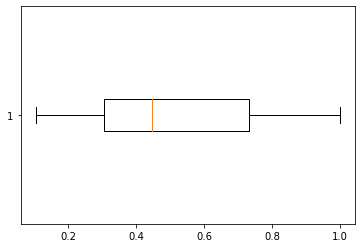

In [10]:
#plt.subplot(1,2,1)
plt.boxplot(Normdata.YearsExperience,vert=False)
#plt.subplot(1,2,2)
#plt.boxplot(Normdata.Salary)
plt.show()
# No outliers

In [ ]:
sns.regplot(x=Normdata['YearsExperience'],y=Normdata['Salary'])

In [ ]:
Normdata.info()

In [ ]:
model1=smf.ols("YearsExperience~Salary",data=Normdata).fit()
model1.summary()


In [ ]:
model1.predict()

In [ ]:
plt.figure(figsize=(12,7),facecolor="lightgreen")
plt.scatter(x,y,color="red",label="actual")
plt.plot(model1.predict(),y,color="grey")
plt.scatter(model1.predict(),y,color="black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [ ]:
model2=smf.ols("YearsExperience~np.log(Salary)",data=Normdata).fit()



In [ ]:
model2.predict()

In [ ]:
model2.summary()

In [ ]:
plt.figure(figsize=(12,7),facecolor="lightgreen")
plt.scatter(x,y,color="red",label="actual")
plt.plot(model2.predict(),y,color="grey")
plt.scatter(model2.predict(),y,color="black",label="predicted")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

In [ ]:
model3=smf.ols("Normdata.YearsExperience~np.exp(Normdata.Salary)",data=Normdata).fit()
model3.predict()

In [ ]:
model3.summary()

In [ ]:
plt.figure(figsize=(12,7),facecolor="lightgreen")
plt.scatter(x,y,color="red",label="actual")
plt.plot(model3.predict(),y,color="grey")
plt.scatter(model3.predict(),y,color="black",label="predicted")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()

In [ ]:
Normdata["YearsExperience_sq"]=Normdata.YearsExperience**2
Normdata["YearsExperience_sq"]

In [ ]:
model4=smf.ols("Salary~YearsExperience+YearsExperience_sq",data=Normdata).fit()
model4.summary()

In [ ]:
model4.predict()

In [ ]:
#Since the R-squared value of model1 is 0.957, which is greater when compared to all the other models so we consider model1 as the best one.